In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
def generate_data(num_records):
  rand_data = []

  for i in range(num_records):
      rand_data.append([random.randint(25,50), random.randint(10, 250) *10000, random.randint(1,5), random.randint(0,1)])

  return rand_data


In [ ]:
  df = pd.DataFrame(generate_data(500), columns=['Age', 'Salary', 'CountFamilyMembers', 'BuysFlat'])
  display(df)

,Age,Salary,CountFamilyMembers,BuysFlat
0,44,1970000,2,1
1,45,1280000,2,1
2,46,920000,3,1
3,32,670000,5,0
4,41,540000,4,0
...,...,...,...,...
495,41,2010000,5,1
496,31,2150000,1,0
497,39,680000,3,1
498,39,2250000,1,0


In [ ]:
X=df.drop('BuysFlat', axis=1)
Y=df['BuysFlat']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)
print(Y.mean(), Y_train.mean(), Y_test.mean())

(500, 3) (350, 3) (150, 3)
(500,) (350,) (150,)
0.5 0.5 0.5


In [ ]:
print(X.mean(), X_train.mean(), X_test.mean())

Age                        37.412
Salary                1288940.000
CountFamilyMembers          2.960
dtype: float64 Age                   3.752000e+01
Salary                1.267600e+06
CountFamilyMembers    2.911429e+00
dtype: float64 Age                   3.716000e+01
Salary                1.338733e+06
CountFamilyMembers    3.073333e+00
dtype: float64


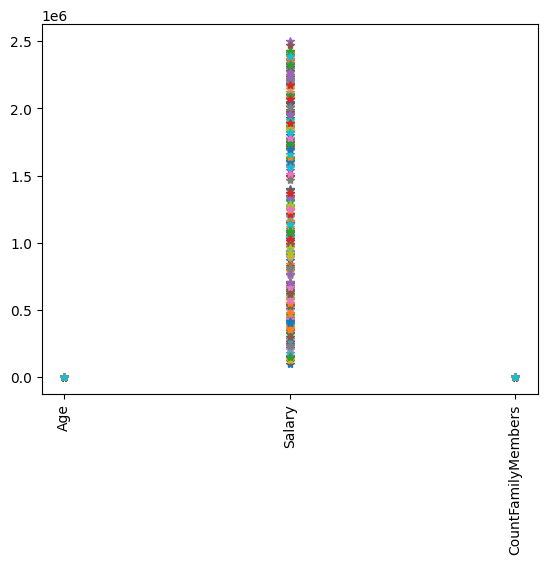

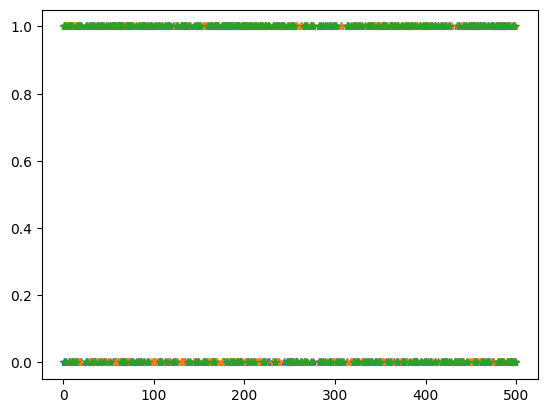

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()
# x_binarised_3_train = X_train['Salary'].map(lambda x: 0 if x < 1.3e+06 else 1)
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
plt.plot(x_binarised_train, '*')
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

x_binarised_test = x_binarised_test.values
x_binarised_train = x_binarised_train.values

In [ ]:
class Perceptron:

    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def model(self, x):
        weighted_sum = np.dot(x, self.weights)
        return weighted_sum >= self.threshold

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, learning_rate=0.01, epochs=100):
        for _ in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                self.weights += learning_rate * (y - y_pred) * x

    def evaluate(self, X, Y):
        Y_pred = self.predict(X)
        accuracy = accuracy_score(Y_pred, Y)
        print("Accuracy:", accuracy)

In [ ]:
# Initialize weights randomly
weights = np.random.rand(X_train.shape[1])
threshold = 0.3

In [ ]:
perceptron = Perceptron(weights, threshold)

In [ ]:
perceptron.fit(X_train.values, Y_train.values)

In [ ]:
perceptron.evaluate(X_test.values, Y_test.values)

Accuracy: 0.5
